# Hypothesis Testing
In this notebook, we consider the concept of hypothesis testing( and its application). By definition, a **statistical hypothesis** is a statement about the parameters of one or more populations. Our interest is to test if the statement is acceptable or not. 

Let's consider a company which manufactures a CMOS chip for a camera of the phone which consists of $50\times50$ pixels. All pixels on a chip should be equivalent to be characterized by a Gaussian distribution of offset counts with mean $\mu_0 = 50$ counts per frame.

Everyday 10 chips are randomly chosen from 1000 chips and the quality of daily manufactured chips is examined.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

from scipy import stats

Each pixel behaves independently due to the electronic design of CMOS chip. Thus, the Bias offset counts in the chip can be simulated by the Gaussian random number.

Mean: 50.0432
Standard Deviation: 2.0324698669353007


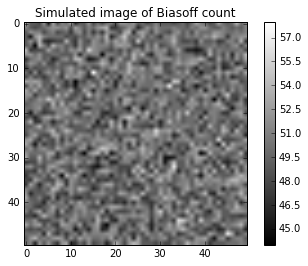

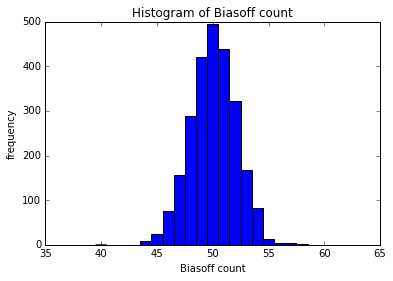

In [2]:
np.random.seed(1)
mu0 = 50
std0 = 2

image = np.round(np.random.normal(mu0, std0, (50, 50)))  # create an image

print('Mean: {}'.format(image.mean()))
print('Standard Deviation: {}'.format(image.std()))

plt.imshow(image, cmap='gray', interpolation=None)
plt.colorbar()
plt.title('Simulated image of Biasoff count')
plt.show()

plt.hist(image.flatten(), bins = np.arange(39, 65)+0.5)
plt.xlabel('Biasoff count')
plt.ylabel('frequency')
plt.title('Histogram of Biasoff count')
plt.show()

10 chips are randomly chosen from 1000 chips. Due to the complexity in the manufacturing process, each chip consists of pixels which are slightly different. Mean of Bias offset count on each chip differs. We consider mean of Bias offset count as a random variable $\textbf{X}$. The sample mean of $\textbf{X}$ is denoted by $\hat{\mu}$ and ths sample standard deviation of $\textbf{X}$ is denoted by $\hat{\sigma}$

The population of chips is characterized by $\mu_0 = 50$, which provides a null hypothesis denoted by $H_0$,
$$
  H_0: \mu_0 = 50
$$
Then, alternative hypothesis is
$$
  H_1: \mu_0 \ne 50
$$

Our goal is to test that the null hypothesis is acceptable or should be rejected based on sample mean from 10 samples.
More specifically, the quality of daily manufactured chips are consistent with the spec $\mu_0 = 50$. If the null hypothesis is rejected, our samples are chosen from a population which differs from the population of mean of offset counts $\mu_0 = 50$.

Let's apply t-test where t-statistic is defined by
$$
\hat{t}_{n-1} = \dfrac{\hat{\mu} - \mu_0}{\dfrac{\hat{\sigma}}{\sqrt{n}}}
$$
for $n-1$ degree of freedom. 1 degree of freedom is spent for estimating mean for the sample of size $n$. 

P-value corresponds to the area of [t-distribution](https://en.wikipedia.org/wiki/Student's_t-distribution) $P(t_{n-1})$ where $|t_{n-1}|> \hat{t}_{n-1}$. This is calculated by cumulative distribution $\Phi(t_{n-1})$ given by 

$$
P-value(\hat{t}_{n-1}) = (1 - \Phi(|\hat{t}_{n-1}|))\times2
$$


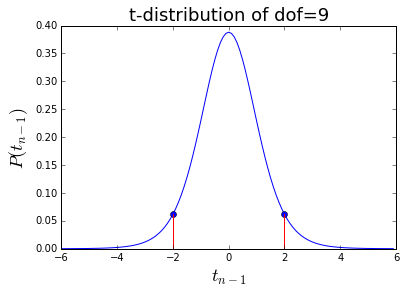

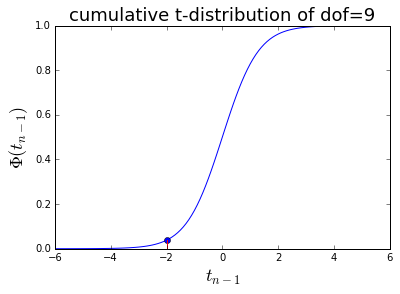

In [3]:
zz = np.arange(-60, 60)*0.1
plt.plot(zz, stats.t.pdf(zz, 9))
plt.stem([-2, 2], stats.t.pdf([-2, 2], 9), 'r-')
plt.title('t-distribution of dof=9', fontsize=18)
plt.xlabel('$t_{n-1}$', fontsize=18)
plt.ylabel('$P(t_{n-1})$', fontsize=18)
plt.show()

plt.plot(zz, stats.t.cdf(zz, 9))
plt.stem([-2], stats.t.cdf([-2], 9), 'r-')
plt.title('cumulative t-distribution of dof=9', fontsize=18)
plt.xlabel('$t_{n-1}$', fontsize=18)
plt.ylabel('$\Phi(t_{n-1})$', fontsize=18)
plt.show()

Cosider two samples of size 10 with different sample mean $\hat{\mu}$ of Bias offset counts.

In [4]:
a = np.array([46.1, 45.5, 47.6, 46.1, 44.1, 56.1, 55.5, 56.6, 49.7, 62.3])
m_a, std_a = a.mean(), a.std()
t0_a = (m_a - mu0)/(std_a/np.sqrt(a.size))
pval_a = stats.t.sf(np.abs(t0_a), a.size-1)*2

print("Mean: {:.3f}".format(m_a))
print("Standard Deviation: {:.3f}".format(std_a))
print("t-statistic: {:.3f}".format(t0_a))
print('p-value = {:.3f}'.format(pval_a))


Mean: 50.960
Standard Deviation: 5.869
t-statistic: 0.517
p-value = 0.617


We accept the null hypothesis $H_0$. The deviation is due to the randomness in the sample.

In [5]:
b = np.array([40.1, 37.5, 49.3, 44.1, 33.1, 54.1, 50.5, 48.7, 49.7, 45.3])
m_b, std_b = b.mean(), b.std()
t0_b = (m_b - mu0)/(std_b/np.sqrt(b.size))
pval_b = stats.t.sf(np.abs(t0_b), b.size-1)*2

print("Mean: {:.3f}".format(m_b))
print("Standard Deviation: {:.3f}".format(std_b))
print("t-statistic: {:.3f}".format(t0_b))
print('p-value = {:.3f}'.format(pval_b))


Mean: 45.240
Standard Deviation: 6.241
t-statistic: -2.412
p-value = 0.039


The p-value is so small. We can reject the null hypothesis with applying the significance level 0.05. 

### Type I error
Rejecting the null hypothesis $H_0$ when it is true.

### Type II error
Failing to reject the null hypothesis $H_0$ when it is flase.

Decision              |   $H_0$ is True  |   $H_0$ is False
--------------------- | -----------------|-------------------
Fail to reject $H_0$  |   No Error       |   Type II Error
Reject $H_0$          |   Type I Error   |   No Error

### Contingency table of Hypthesis testing


Decision              |     $H_0$ is True                 |   $H_0$ is False
--------------------- | ----------------------------------|-------------------
Fail to reject $H_0$  |   1 - $\alpha$                    |   $\beta$ = P(Type II Error)
Reject $H_0$          |   $\alpha$ = P(Type I Error)      |   1 - $\beta$

However, p-value can be lower due to the bigger size of sample.

# Bayesian posterior inference

Bayes rules is written by
$$
P(\theta|X) = \dfrac{P(X|\theta)P(\theta)}{P(X)}
$$
where $\theta$ is a parameter of our interest and $X$ is a set of measured data. $P(\theta|X)$ is called a posterior which represents the probability distribution of the parameter $\theta$ given the data set $X$. $P(\theta)$ called a prior is the probability distribution of parameter $\theta$. $P(X|\theta)$ describes the likelihood of parameter $\theta$ given the measured data $X$.

Consider Bayesian approach to estimate a parameter $\theta$ for a given data $X$

  

## Posterior sampling using conjugate priors
 [Conjugate priors](https://en.wikipedia.org/wiki/Conjugate_prior) >> The prior distributions $P(\theta)$ are  are in the same family as the posterior distributions  $P(\theta|X)$. For instance, a Gaussian distribution $P(\theta)$ with the Gaussina likelihood $P(X|\theta)$ gives the Gaussian posterior $P(\theta|X)$.

We consider again the CMOS chips with mean of offset count $\mu_0 = 50$. Standard deviation $\sigma = 2$ is taken into account.


## Define a posterior sampler using a conjugate prior of Gaussian

In [6]:
def sampler(data, n_samples=10, mu_init=0., proposal_width=1.,
                                mu_prior_mu=0., mu_prior_sd=1.):
    mu_cur = mu_init
    posterior = np.zeros(1 + n_samples, dtype=float)
    posterior[0] = mu_cur
    std = data.std()
    for i in range(n_samples):
        # suggest a new mu
        mu_pro = stats.norm(mu_cur, proposal_width).rvs()
        # calculate prior probability of current and proposed mu
        prior_cur = stats.norm(mu_prior_mu, mu_prior_sd).pdf(mu_cur)
        prior_pro = stats.norm(mu_prior_mu, mu_prior_sd).pdf(mu_pro)
        # calculate likelihood by multiplying probabilites of each data point
        lh_cur = stats.norm(data, std).pdf(mu_cur).prod()
        lh_pro = stats.norm(data, std).pdf(mu_pro).prod()

        p_cur = lh_cur * prior_cur
        p_pro = lh_pro * prior_pro
        # accept the proposed mu
        if np.random.rand() < p_pro/p_cur:
            mu_cur = mu_pro
        posterior[i+1] = mu_cur
    return posterior

## Perform the sampling

In [7]:
np.random.seed(1)
data = stats.norm(45., 2.).rvs(20)
posterior = sampler(data, n_samples=5000, mu_init=data.mean(), proposal_width=0.5, mu_prior_mu=50., mu_prior_sd=2.)

## Examine statistics of the posterior obtained by the sampling

In [8]:
post_m = posterior.mean()
post_std = posterior.std()

print('Mean: {:.3f}'.format(post_m))
print('Standard deviation: {:.3f}'.format(post_std))

Mean: 45.021
Standard deviation: 0.487


## Plot the histogram of posterior and compare its gaussian distribution

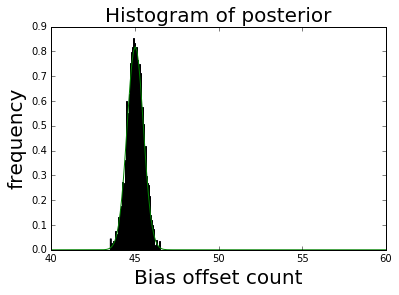

In [9]:
x =  np.linspace(40, 60, 200)
post_anal =  stats.norm(post_m, post_std).pdf(x) 

a = int(posterior.min())
b = int(posterior.max())
z = np.arange(a, b+2) - 0.5
plt.hist(posterior, bins=50, normed=True)
plt.plot(x, post_anal)

plt.title('Histogram of posterior', fontsize=20)
plt.xlabel('Bias offset count', fontsize=20)
plt.ylabel('frequency', fontsize=20)
plt.show()


Estimation $\theta$=45.021 differs from population mean $\mu_0 = 50$. Thus, based on the current sample, the hypothesis $H_0: \mu_0=50$ is rejected.